In [27]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

Names and PRN for all group members:
- Name: ______________________
- PRN:  ______________________
- Date: ______________________

# Deep Neural Networks
## A07: Group Assignment


##  Convolutional Neural Network (CNN)

- Flowers Dataset


In [28]:
###-----------------
### Import Libraries
###-----------------

#!/usr/bin/env pyhton3
# -*- coding

from sklearn import datasets
from sklearn.model_selection import train_test_split
###-----------------
### Import Libraries
###-----------------
import os
import time
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import gc
import torch.nn as nn
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [29]:
###----------------------
### Some basic parameters
###----------------------
# Global variables
inpDir = './input' # Input Stored here
outDir = './ouput' # output Here
modelDir = './models'# to save Models
subDir = 'flower_photos' # sub dir by dataset
alrName = 'base_model'
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
#rng = np.random.default_rng(seed = RANDOM_STATE)
#N_SAMPLE = 1000
TEST_SIZE = 0.2 # 18147 - 56*256
ALPHA = 0.001 # learning rate
NOISE = 0.2 # Error
EPOCHS = 80
BATCH_SIZE = 8

PATIENCE = 30
LR_FACTOR  =0.1
LR_PATIENCE = 10
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [30]:
#set the plotting parameters
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }
    #'text.usetex':True,

plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


## Load Dataset

Images are under flower_photos

     |- daisy
     |- dandelion
     |- roses
     |- sunflowers
     |- tulips

In [31]:
'''
    For reading from web link
'''

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                  fname='flower_photos',
                                  untar=True)
data_dir = pathlib.Path(data_dir)
'''
#     For reading from local directory
# '''
# data_dir = os.path.join(inpDir, subDir)

'\n#     For reading from local directory\n# '

In [32]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [33]:
os.listdir(data_dir)

['tulips', 'LICENSE.txt', 'sunflowers', 'roses', 'dandelion', 'daisy']

In [34]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
     data_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT,IMG_WIDTH),
    subset='training',
    seed = RANDOM_STATE,
    validation_split=TEST_SIZE,


)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [35]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
     data_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT,IMG_WIDTH),
    subset='validation',
    seed = RANDOM_STATE,
    validation_split=TEST_SIZE,


)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [36]:
#Is it getting the class names

class_names = train_ds.class_names
num_classes = len(class_names)
display(class_names, num_classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

5

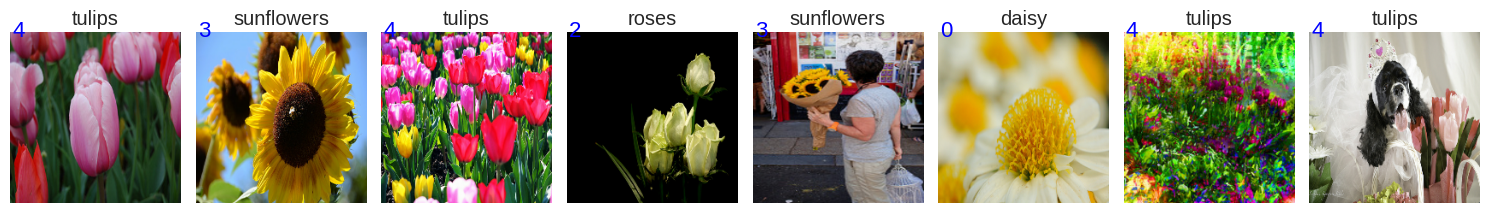

In [37]:
# sample DATA plot: Display a grid of images from the dataset along with their labels



#create a new figure for the grid of images with a specified size
fig = plt.figure(figsize  =(15,12))

#Adjust Margins
fig.subplots_adjust(left = 0, right = 1, bottom=0, top = 1, hspace =0.05, wspace = 0.05)
i= 0
for images, labels in train_ds.take(1):
    for i in range(BATCH_SIZE):
        plt.subplot(BATCH_SIZE// 8,8, i+1)
        plt.grid(False)

        plt.imshow(images[i].numpy().astype('uint8'), cmap = plt.cm.binary)

        # Add the numeric label to the image in blue text at a specific position
        plt.title(class_names[labels[i].numpy()])


        # Add the class name of the image in red text below the numeric label
        plt.text(2,4, labels[i].numpy(), color = 'b', fontsize=16)
    #SWITCH OF AXIS
        plt.axis('off')
plt.tight_layout()
#Display the entire frid of images
plt.show()

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming train_ds and test_ds are defined and loaded correctly

def fn_plot_label(train_ds, test_ds):
    """
    Displays a grid of images from the dataset along with their labels.
    """

    class_names = train_ds.class_names
    BATCH_SIZE = 32  # Assuming BATCH_SIZE is 32, adjust if necessary

    # Create a new figure for the grid of images with a specified size
    fig = plt.figure(figsize=(15, 12))

    # Adjust Margins
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for images, labels in train_ds.take(1):
        for i in range(BATCH_SIZE):
            plt.subplot(BATCH_SIZE // 8, 8, i + 1)
            plt.grid(False)

            plt.imshow(images[i].numpy().astype('uint8'), cmap=plt.cm.binary)

            # Add the numeric label to the image in blue text at a specific position
            plt.title(class_names[labels[i].numpy()])

            # Add the class name of the image in red text below the numeric label
            plt.text(2, 4, labels[i].numpy(), color='b', fontsize=16)

            # Switch off axis
            plt.axis('off')

    plt.tight_layout()
    # Display the entire grid of images
    plt.show()

In [39]:
# fn_plot_label(train_ds, test_ds)

In [40]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

## Data Augmentation

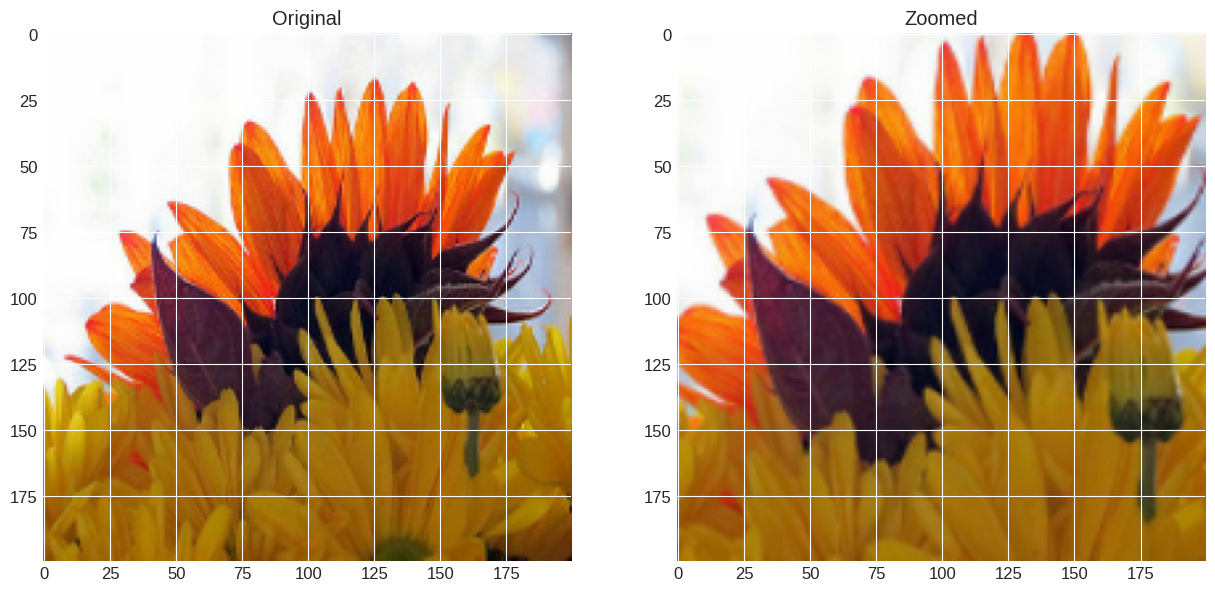

In [41]:
layer = tf.keras.layers.RandomZoom(height_factor=(-.2, -.2),
                                 width_factor=(-.2, -.2),
                                  seed = RANDOM_STATE)


plt.figure()

img_num = 2
for imgs, lbls in train_ds.take(1):
    out_image = layer(imgs)
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(imgs[img_num].numpy().astype('uint8'))
    plt.subplot(1,2,2)
    plt.title('Zoomed')
    plt.imshow(out_image[img_num].numpy().astype('uint8'))

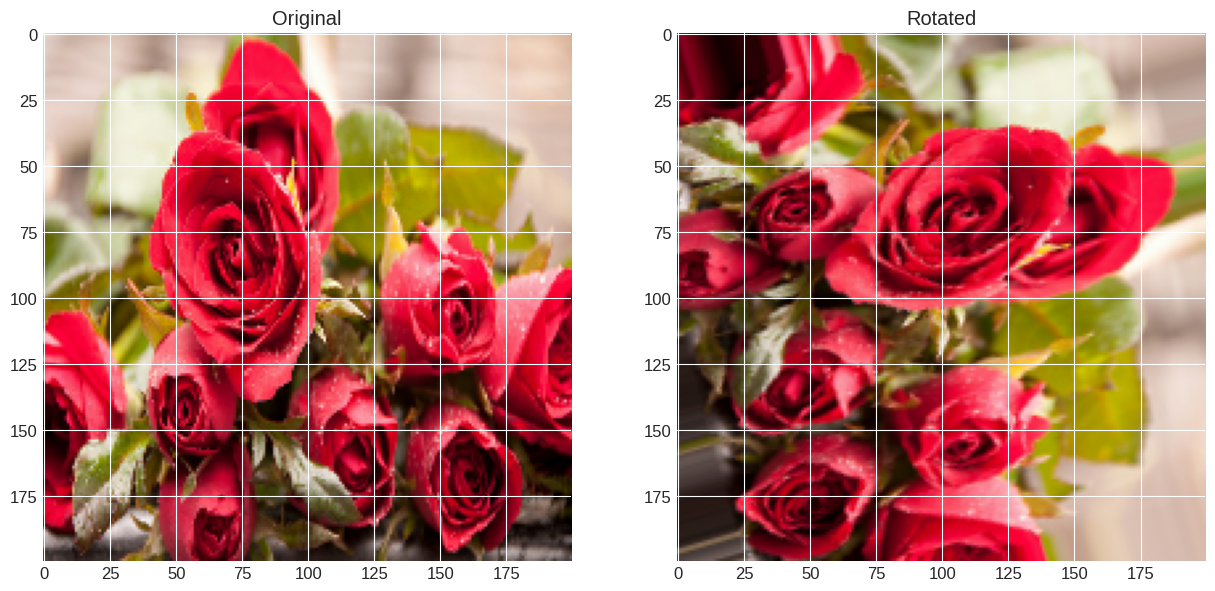

In [42]:
layer = tf.keras.layers.RandomRotation(
    (-0.5,0.5),
    fill_mode='nearest',

    seed=RANDOM_STATE,

)

plt.figure()

img_num = 2
for imgs, lbls in train_ds.take(1):
    out_image = layer(imgs)
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(imgs[img_num].numpy().astype('uint8'))
    plt.subplot(1,2,2)
    plt.title('Rotated')
    plt.imshow(out_image[img_num].numpy().astype('uint8'))

In [43]:
train_ds = train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [44]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Flip images randomly
   tf.keras.layers.RandomRotation(factor = (-0.3,0.3),
                                   fill_mode='nearest')                   # Rotate images by up to 20%
   # tf.keras.layers.RandomZoom(0.2)                       # Zoom in/out randomly
                       # Adjust contrast
])

# **Building the model**

:* Only Batch Normalisation is activated
* DropOut 0.1 - 0.2 - 0.3 - 0.3 - 0.2 - 0.1 - 0.3  -> val loss =1.18
* Dropout 0.2 - 0.2 - 0.2 - 0.2 - 0.2 - 0.2 - 0.2 -> val_loss = 1.1194 val_accuracy -> 0.6376

* Dropout uniform = 0.3 -> val_loss = 1.2637       val_accuarcy = 0.5613

* Dropout uniform = 0.1 -> val_loss = 0.9777 val_accuracy = 0.6880


In [45]:
krnl_initializer =tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)
krnl_reg = None
#tf.keras.regularizers.L2(l2=0.01)




#Dropout
dor0 = 0.0
dor1 = 0.1
dor2 = 0.2
dor3 = 0.3
dor4 = 0.4
dor5 = 0.5

inputs = tf.keras.Input(shape = input_shape, name = 'input')

x = data_augmentation(inputs)

x = tf.keras.layers.Rescaling(1./255.)(x)


##....
#Set1
#conv

x = tf.keras.layers.Conv2D(64, (3,3), kernel_initializer=krnl_initializer,

                          padding='same',

                         name = 'conv_1')(x) #o/p (188,188,64)
#batch norm
x = tf.keras.layers.BatchNormalization()(x)
#activation
x = tf.keras.layers.ReLU()(x)
#Dropout layer
x = tf.keras.layers.Dropout(dor1)(x)

# MAxpool
x = tf.keras.layers.MaxPool2D((2,2), name='mp_1')(x) #o/p (94,94,64)



##....
#Set2
#conv

x = tf.keras.layers.Conv2D(128, (3,3), kernel_initializer=krnl_initializer,

                         name = 'conv_2')(x) #o/p (92,92,128)
#batch norm
x = tf.keras.layers.BatchNormalization()(x)
#activation
x = tf.keras.layers.ReLU()(x)
#Dropout layer
x = tf.keras.layers.Dropout(dor2)(x)

# MAxpool
x = tf.keras.layers.MaxPool2D((2,2), name='mp_2')(x) #o/p (46,46,128)



##....
#Set3
#conv

x = tf.keras.layers.Conv2D(256, (3,3), kernel_initializer=krnl_initializer,

                         name = 'conv_3')(x) #o/p (44,44,256)
#batch norm
x = tf.keras.layers.BatchNormalization()(x)
#activation
x = tf.keras.layers.ReLU()(x)
#Dropout layer
x = tf.keras.layers.Dropout(dor2)(x)

# MAxpool
x = tf.keras.layers.MaxPool2D((2,2), name='mp_3')(x) #o/p (22,22,256)



##....
#Set4
#conv

x = tf.keras.layers.Conv2D(512, (3,3), kernel_initializer=krnl_initializer,

                         name = 'conv_4')(x) #o/p (20,20,512)
#batch norm
x = tf.keras.layers.BatchNormalization()(x)
#activation
x = tf.keras.layers.ReLU()(x)
#Dropout layer
x = tf.keras.layers.Dropout(dor3)(x)

# MAxpool
x = tf.keras.layers.MaxPool2D((2,2), name='mp_4')(x) #o/p (10,10,512)

#Set5
#conv

x = tf.keras.layers.Conv2D(1024, (3,3), kernel_initializer=krnl_initializer,

                          name = 'conv_5')(x) #o/p (8,8,1024)

#batch norm
x = tf.keras.layers.BatchNormalization()(x)
#activation
x = tf.keras.layers.ReLU()(x)
#Dropout layer
x = tf.keras.layers.Dropout(dor2)(x)



# MAxpool
x = tf.keras.layers.MaxPool2D((2,2), name='mp_5')(x) #o/p (4,4,1024)


#Set6
#conv

x = tf.keras.layers.Conv2D(2048, (3,3), kernel_initializer=krnl_initializer,

                          name = 'conv_6')(x) #o/p (2,2,2048)

#batch norm
x = tf.keras.layers.BatchNormalization()(x)
#activation
x = tf.keras.layers.ReLU()(x)
#Dropout layer
x = tf.keras.layers.Dropout(dor2)(x)


#Set7
#conv

x = tf.keras.layers.Conv2D(4096, (1,1), kernel_initializer=krnl_initializer,

                          name = 'conv_7')(x) #o/p (2,2,4096)

#batch norm
x = tf.keras.layers.BatchNormalization()(x)
#activation
x = tf.keras.layers.ReLU()(x)
#Dropout layer
x = tf.keras.layers.Dropout(dor1)(x)


x = tf.keras.layers.Flatten()(x)

#Layer 1
x = tf.keras.layers.Dense(4096,#1024,activation=tf.keras.activations.relu,

                         name = 'fc_1')(x)
#batch norm
x = tf.keras.layers.BatchNormalization()(x)
#activation
x = tf.keras.layers.ReLU()(x)
#Dropout layer
x = tf.keras.layers.Dropout(dor1)(x)

#Layer 2
x = tf.keras.layers.Dense(1024,activation=tf.keras.activations.relu,

                         name = 'fc_2')(x)
#batch norm
x = tf.keras.layers.BatchNormalization()(x)
#activation
x = tf.keras.layers.ReLU()(x)
#Dropout layer
x = tf.keras.layers.Dropout(dor2)(x)


#layer3
x = tf.keras.layers.Dense(256,activation=tf.keras.activations.relu,

                         name = 'fc_3')(x)
#batch norm
x = tf.keras.layers.BatchNormalization()(x)
#activation
x = tf.keras.layers.ReLU()(x)
#Dropout layer
x = tf.keras.layers.Dropout(dor2)(x)

#layer 4
x = tf.keras.layers.Dense(64,activation=tf.keras.activations.relu,

                         name = 'fc_4')(x)
#batch norm
x = tf.keras.layers.BatchNormalization()(x)
#activation
x = tf.keras.layers.ReLU()(x)
#Dropout layer
x = tf.keras.layers.Dropout(dor1)(x)

#Output layer
outputs = tf.keras.layers.Dense(5,
                                 activation='softmax',
                               name = 'output')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'Flowers')
model.summary()


Model: "Flowers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_1 (Conv2D)                      │ (None, 200, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 200, 200, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_22 (ReLU)                      │ (None, 200, 200, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 200, 200, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp_1 (MaxPooling2D)                  │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 98, 98, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 98, 98, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_23 (ReLU)                      │ (None, 98, 98, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 98, 98, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp_2 (MaxPooling2D)                  │ (None, 49, 49, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3 (Conv2D)                      │ (None, 47, 47, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 47, 47, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_24 (ReLU)                      │ (None, 47, 47, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 47, 47, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp_3 (MaxPooling2D)                  │ (None, 23, 23, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_4 (Conv2D)                      │ (None, 21, 21, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 21, 21, 512)         │           2,0

 Total params: 105,181,445 (401.24 MB)

 Trainable params: 105,154,309 (401.13 MB)

 Non-trainable params: 27,136 (106.00 KB)

In [46]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False)

optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [47]:
altName = "Flowers_Model"  # Assign a value to altName

chkptFilePath = os.path.join(modelDir, subDir, f'{altName}.weights.h5')
PATIENCE = 30

mcb = tf.keras.callbacks.ModelCheckpoint(chkptFilePath,
                                        monitor = 'val_loss',
                                        verbose = 1,
                                        save_best_only = True,
                                        save_weights_only = True)

escb = tf.keras.callbacks.EarlyStopping(patience = PATIENCE,
                                       verbose = 1,
                                       restore_best_weights = True)

lrcb = tf.keras.callbacks.ReduceLROnPlateau(factor = LR_FACTOR,
                                           patience = LR_PATIENCE,
                                           verbose = 1)

In [48]:

history = model.fit(train_ds, epochs=EPOCHS,
                    callbacks = [mcb, escb, lrcb],
                    validation_data=test_ds,
                   verbose = 1)

# results and inferences
hist_df = pd.DataFrame(history.history)

display(hist_df.head(3))
display(hist_df.tail(3))



Epoch 1/80
314/367 ━━━━━━━━━━━━━━━━━━━━ 7:36 9s/step - accuracy: 0.2961 - loss: 1.6950

KeyboardInterrupt: 

### Reload best Weights for evaluation

In [ ]:
def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: accuracy
            column 1: loss
            column 2: val_accuracy
            column 3: val_loss
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y4] == hist_df[y4].min()]

    ax = axes[0]

    hist_df.plot(y = [y2,y4], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n   test: {:6.4f}'
    txtstr = txtFmt.format(y2.capitalize(),
                           hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel('Epochs')
    ax.set_ylabel(y2.capitalize())
    ax.set_title('Errors')
    ax.grid(True)
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y1, y3], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n  test:  {:6.4f}'
    txtstr = txtFmt.format(y1.capitalize(),
                           hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.grid(True)
    ax.legend(loc = 'lower left')

    plt.tight_layout()





In [ ]:
fn_plot_tf_hist(hist_df = hist_df)


* 3 layers  
* uniform = 0.1 drop out

In [ ]:
fn_plot_tf_hist(hist_df = hist_df)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Evaluate the model

## Validate on the validation set